前面Perceptron 能夠讓我們成功達成二元分類，但我們只能知道預測結果是A還是B，沒辦法知道是A、是B的機率是多少。這種應用在我們生活中非常常見，比如說我們要根據今天的溫度、濕度、風向來預測明天的天氣，通常我們會需要知道明天是晴天的機率以及雨天的機率，來決定是否帶傘具出門。如果使用Logistic Regression就可以幫我們達成這樣的目標!

很重要的一點是Logistic Regression(邏輯斯回歸)很多人看名字以為是回歸的模型，但其實是一個分類的模型，名字取的不好很容易讓人誤解。這個分類的模型大致跟Perceptron類似，只是Perceptron是根據 w0*x0+w1*x1+…+wn*xn >0 或≤0來判斷成A或B類，而Logistic Regression則是一個平滑的曲線，當w0*x0+w1*x1+…+wn*xn越大時判斷成A類的機率越大，越小時判斷成A類的機率越小。由於是二元分類，如果判斷成A類的機率越小，B類的機率越大(判斷成B類的機率 = 1 - 判斷成A的機率)。

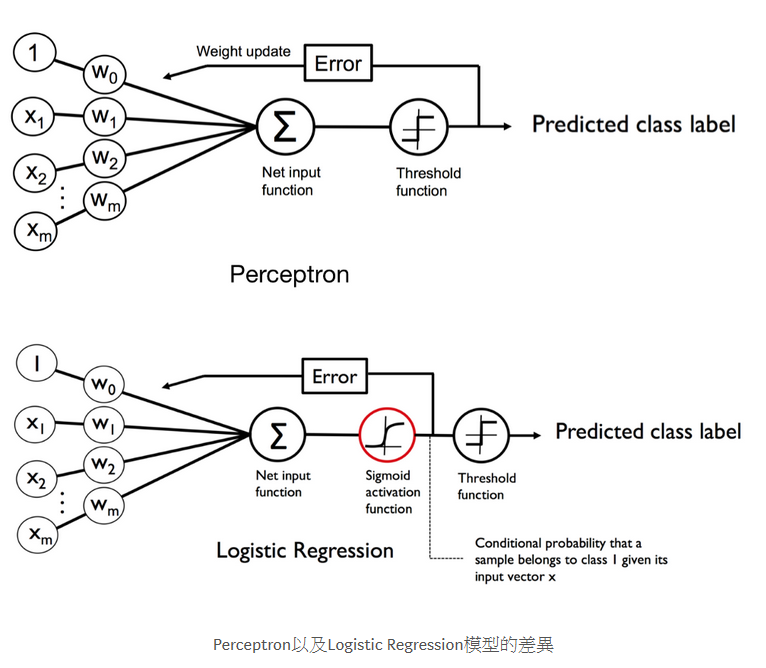

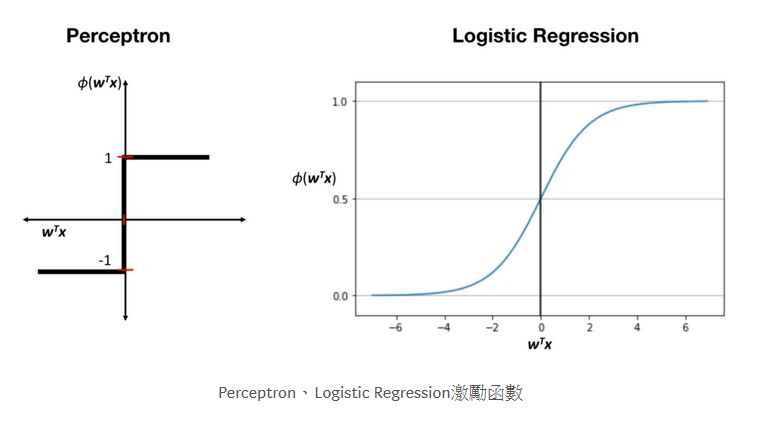


首現先介紹一下Sigmoid函數，也稱為logistic function，這個函數的y 的值介於 0~1，這樣的分布也符合機率是在0~1的範圍中。或許有人會覺得疑惑，Logistic Regression為什麼要用這個Logistic函數？其實也可以改用其他符合0~1的函數（因為機率的值是介於0~1），只是Logistic 函數是這種介於0~1的平滑函數中相對簡單的。

依下圖所示，當Z=0時判斷成+1類(A類)的機率為0.5，因此只要 z >0 判斷成 A類的機率就會>0.5 ，我們也就把它判斷成+1類(A類)。(這邊跟上一章perceptron一樣，只是多了機率的資訊) 如果z≤0 判斷成A類的機率就≤0.5 ，因此我們就把他判斷成-1類(B類)

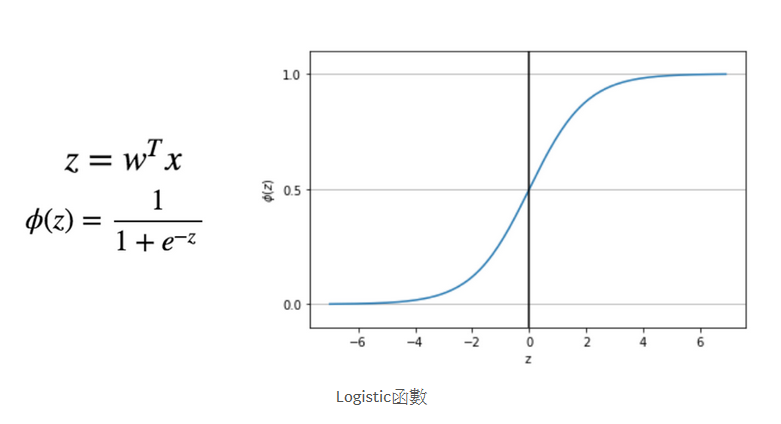

接下來要說明要這個Logistic Regression要怎麼找到一條線，將兩群做線性分類，最終的結果如下圖所示

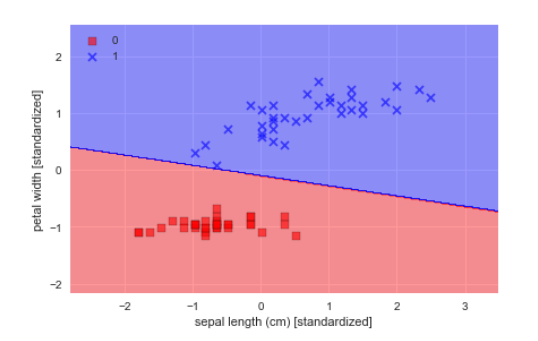

為了數學推導方便，之前我們將二元分類的A類以+1表示、B類以-1表示，現在將A類改以+1表示、B類以0表示。我們想要找到一組w，能夠將下方的式子變成最大值，那組w就是我們要找的線(z=w*x)。下方的式子是希望當y=1的時候 ∅(z) 越靠近1（判斷成A類的機率越大），由於1-y是0所以右邊的項會是1，當y=0時左邊這項會是1右邊這項希望 ∅(z) 越靠近0越好（判斷成B類的機率越大）。

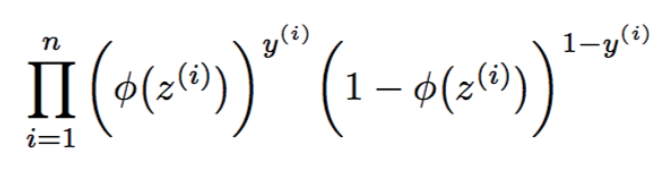

## 載入Iris資料集


In [2]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(iris['data'].size)
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(5)

600
target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


使用sklearn中的model_selection函式將把資料分為兩群tarin、test，將來可使用test資料來檢驗我們的分類模型效果

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

## 使用Logistic Regression之前需要先對資料做特徵縮放 



In [19]:
from sklearn.preprocessing import StandardScaler
#print(X_train)
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
y_train['target'].values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

初始化Logistic Regression函式，以及將資料放進Logistic Regression開始訓練

In [21]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train,y_train['target'].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
lr2 = LogisticRegression(solver='lbfgs')
lr2.fit(X_train_std,y_train['target'].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

視覺化訓練後的結果，可以明顯看出最後產出一條線將資料分為兩類

In [24]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


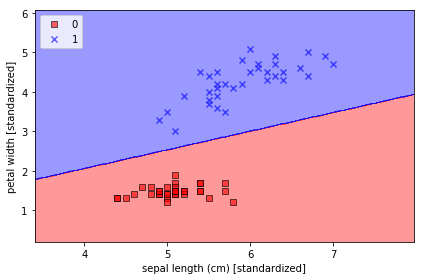

In [11]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=lr)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


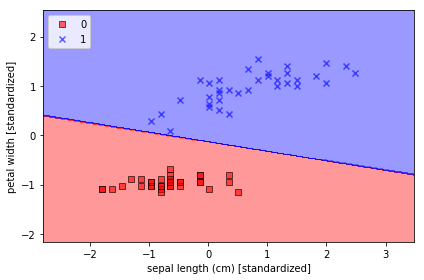

In [37]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=lr2)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
lr2.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [27]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [28]:
error = 0
for i, v in enumerate(lr2.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


In [29]:
lr2.predict_proba(X_test_std)

array([[0.93950553, 0.06049447],
       [0.00595915, 0.99404085],
       [0.9739773 , 0.0260227 ],
       [0.02129542, 0.97870458],
       [0.01197475, 0.98802525],
       [0.32115763, 0.67884237],
       [0.95291431, 0.04708569],
       [0.01005256, 0.98994744],
       [0.00869903, 0.99130097],
       [0.03873028, 0.96126972],
       [0.06753272, 0.93246728],
       [0.05271327, 0.94728673],
       [0.01644341, 0.98355659],
       [0.98768451, 0.01231549],
       [0.95017692, 0.04982308],
       [0.94875229, 0.05124771],
       [0.98695682, 0.01304318],
       [0.90907333, 0.09092667],
       [0.93786812, 0.06213188],
       [0.97541109, 0.02458891],
       [0.93950553, 0.06049447],
       [0.04459943, 0.95540057],
       [0.96441235, 0.03558765],
       [0.04100282, 0.95899718],
       [0.96541751, 0.03458249],
       [0.93611521, 0.06388479],
       [0.97082654, 0.02917346],
       [0.04714364, 0.95285636],
       [0.06396203, 0.93603797],
       [0.00445149, 0.99554851]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


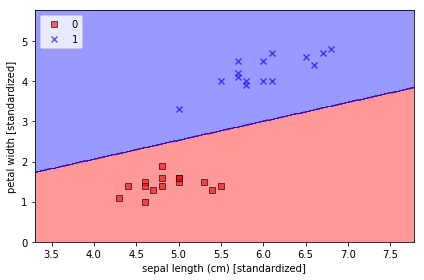

In [30]:
plot_decision_regions(X_test.values, y_test['target'].values, classifier=lr)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


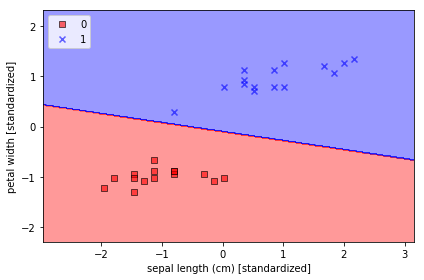

In [31]:
plot_decision_regions(X_test_std, y_test['target'].values, classifier=lr2)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Logistic Regression優點：

    資料不需要線性可分
    可以獲得A類跟B類的機率
    實務上Logistic Regression執行速度非常快

Logistic Regression缺點：

    線的切法不夠漂亮，以人的觀察應該要大概要像是綠色的線才是一個比較好的分法（下一章的SVM將會解決這個問題）
    
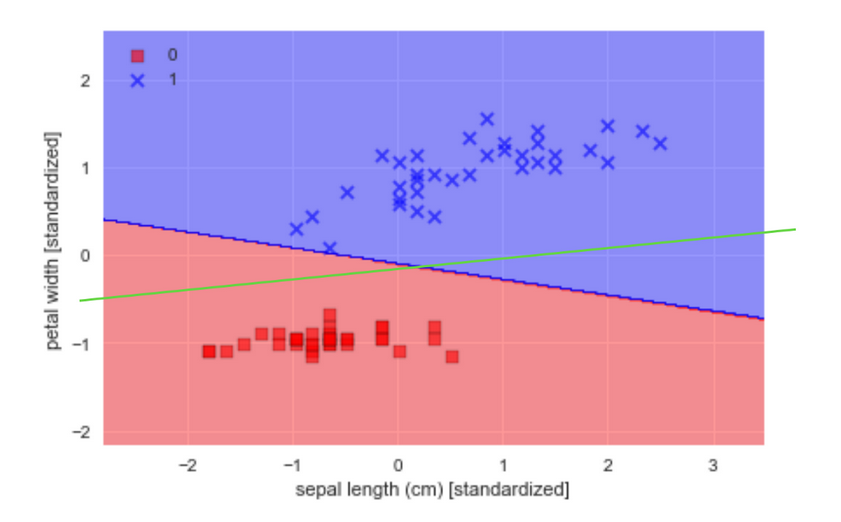